# Pre-processing 1

In [ ]:
# Installing the libraries
import nltk
import pandas as pd
import os
from nltk.tokenize import word_tokenize
import numpy as np

In [ ]:
# Reading the dataset
dataset = pd.read_csv('/content/Resume.csv')
dataset.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
# Sample code to checking for missing values
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64


In [ ]:
dataset['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

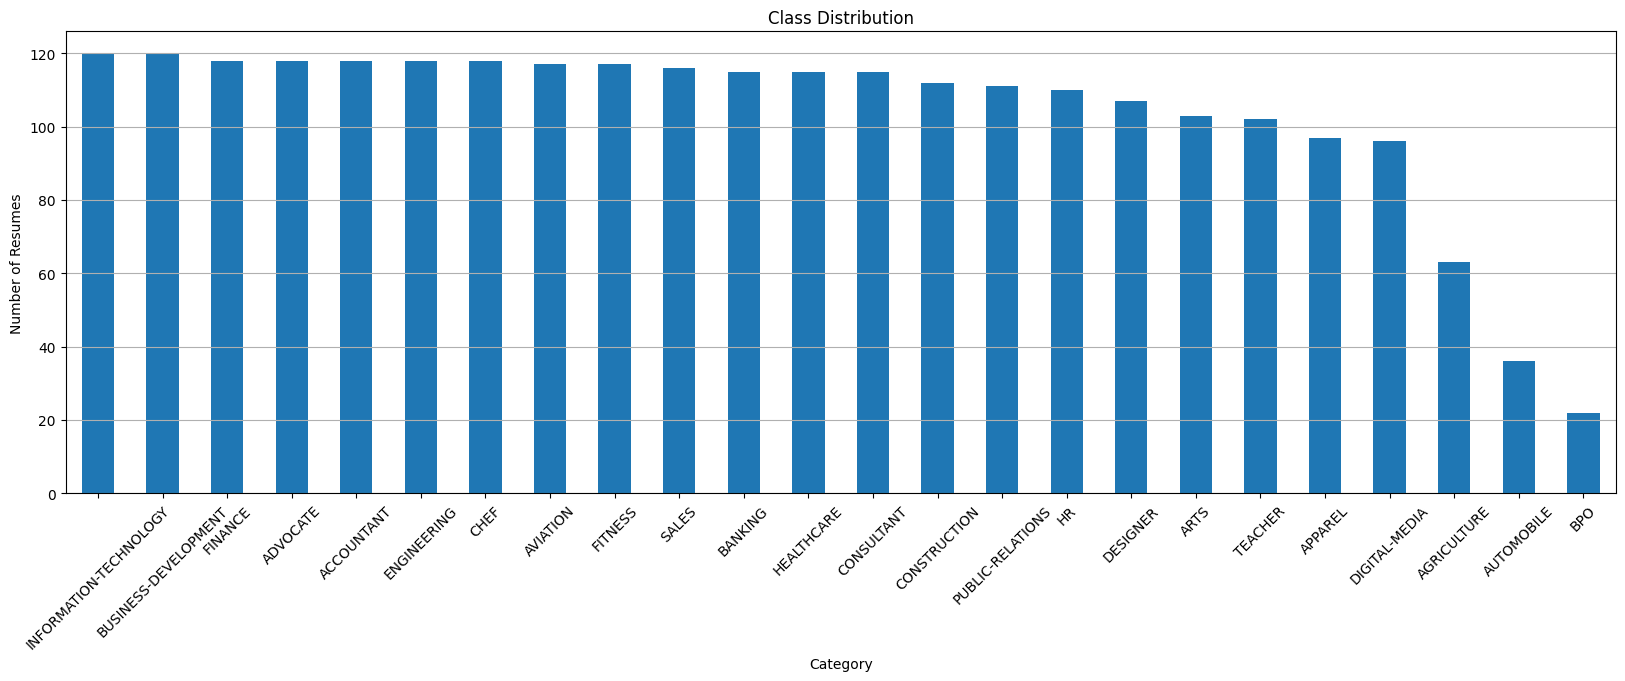

In [ ]:
import matplotlib.pyplot as plt

class_distribution = dataset['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(20, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Pre-processing 2

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

def tokenize_tweet(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove links
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if not token.startswith(('http', '//t.co/'))]

    return tokens
dataset['tokenized_text'] = dataset['Resume_str'].apply(tokenize_tweet)

In [ ]:
# Print the tokenized tweets
for index, row in dataset.iterrows():
    print(f"Original Text: {row['Resume_str']}")
    print(f"Tokenized Text: {row['tokenized_text']}")
    print("\n")

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Load stopwords
stop_words_set = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(row):
    text = row['tokenized_text']
    words = [word for word in text if len(word) > 2 and word.lower() not in stop_words_set]
    return words

# Apply stopwords removal
dataset["tokenized_text"] = dataset.apply(remove_stopwords, axis=1)

In [ ]:
# Print the removed-stopwords text
for index, row in dataset.iterrows():
    print(f"Original Text: {row['Resume_str']}")
    print(f"Tokenized Text: {row['tokenized_text']}")
    print("\n")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Ensure all values in the 'tokenized_text' column are lists
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda x: x if isinstance(x, list) else [])

# Combine tokenized text into sentences
dataset['sentences'] = dataset['tokenized_text'].apply(lambda x: ' '.join(map(str, x)))  # Joining the tokens into a single string

# Split data into features (X) and labels (y)
X = dataset['sentences']
y = dataset['Category']  # Assuming you have a column named 'category' for labels

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)


In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Determine the unique categories
unique_categories = y.unique()

# Initialize lists to store the stratified test data
X_test_stratified = []
y_test_stratified = []

# Loop through each category and split the test data
for category in unique_categories:
    # Filter data for the current category
    X_category = X[y == category]
    y_category = y[y == category]

    # Split the data for the current category
    X_category_train, X_category_test, y_category_train, y_category_test = train_test_split(X_category, y_category, test_size=0.2, random_state=42)

    # Append the test data for the current category to the stratified lists
    X_test_stratified.append(X_category_test)
    y_test_stratified.append(y_category_test)

# Concatenate the stratified test data for all categories
X_test = pd.concat(X_test_stratified)
y_test = pd.concat(y_test_stratified)

# Optionally, you can obtain the training data by removing the test data from the original dataset
X_train = X.drop(X_test.index)
y_train = y.drop(y_test.index)

# Concatenate X_train and y_train along the column axis
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

# Print class distribution for training and testing sets
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting Set Class Distribution:")
print(y_test.value_counts(normalize=True))

# Display the shape of the combined training dataset
print("Shape of the combined training dataset:", training_data.shape)
print("Shape of the combined testing dataset:", testing_data.shape)

print(training_data.columns)
print(training_data.dtypes)





Training Set Class Distribution:
Category
FINANCE                   0.0480
INFORMATION-TECHNOLOGY    0.0480
ADVOCATE                  0.0480
BUSINESS-DEVELOPMENT      0.0480
ACCOUNTANT                0.0480
ENGINEERING               0.0480
CHEF                      0.0480
AVIATION                  0.0472
FITNESS                   0.0472
BANKING                   0.0464
HEALTHCARE                0.0464
SALES                     0.0464
CONSULTANT                0.0464
PUBLIC-RELATIONS          0.0448
CONSTRUCTION              0.0448
HR                        0.0448
DESIGNER                  0.0432
ARTS                      0.0416
TEACHER                   0.0408
APPAREL                   0.0384
DIGITAL-MEDIA             0.0384
AGRICULTURE               0.0256
AUTOMOBILE                0.0136
BPO                       0.0080
Name: proportion, dtype: float64

Testing Set Class Distribution:
Category
INFORMATION-TECHNOLOGY    0.049844
BUSINESS-DEVELOPMENT      0.049844
AVIATION             

## Support vector machine

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Convert features and labels to lists of strings
x_train = training_data['sentences'].astype(str).tolist()
y_train = training_data['Category'].astype(str).tolist()

# Convert testing data to lists of strings
x_test = testing_data['sentences'].astype(str).tolist()
y_test = testing_data['Category'].astype(str).tolist()

# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3600, min_df=2, max_df=0.5, ngram_range=(1,1))
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Train SVM classifier
svm_classifier = SVC(C=1.9, kernel='linear')
svm_classifier.fit(x_train_tfidf, y_train)

# Make predictions
svm_predictions = svm_classifier.predict(x_test_tfidf)

# Calculate training accuracy
train_predictions = svm_classifier.predict(x_train_tfidf)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)


# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, svm_predictions)
print("Testing Accuracy:", test_accuracy)




Training Accuracy: 0.9936
Testing Accuracy: 0.6666666666666666
